# Basic Tensors

In this ungraded lab, you will try some of the basic operations you can perform on tensors.

## Imports

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np

## Exercise on basic Tensor operations

Lets create a single dimension numpy array on which you can perform some operation. You'll make an array of size 25, holding values from 0 to 24.

In [2]:
# Create a 1D uint8 NumPy array comprising of first 25 natural numbers
x = np.arange(0, 25)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

Now that you have your 1-D array, next you'll change that array into a `tensor`. After running the code block below, take a moment to inspect the information of your tensor.

In [3]:
# Convert NumPy array to Tensor using `tf.constant`
x = tf.constant(x)
x

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])>

As the first operation to be performed, you'll square (element-wise) all the values in the tensor `x`

In [4]:
# Square the input tensor x
x = tf.square(x)
x

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576])>

One feature of tensors is that they can be reshaped. When reshpaing, make sure you consider dimensions that will include all of the values of the tensor.

In [5]:
# Reshape tensor x into a 5 x 5 matrix. 
x = tf.reshape(x, (5, 5))
x

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])>

Notice that you'll get an error message if you choose a shape that cannot be exactly filled with the values of the given tensor.  
* Run the cell below and look at the error message
* Try to change the tuple that is passed to `shape` to avoid an error.

In [7]:
# Try this and look at the error
# Try to change the input to `shape` to avoid an error
tmp = tf.constant([1,2,3,4])
#tf.reshape(tmp, shape=(2,3))
tf.reshape(tmp, shape=(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

Like reshaping, you can also change the data type of the values within the tensor. Run the cell below to change the data type from `int` to `float`

In [8]:
# Cast tensor x into float32. Notice the change in the dtype.
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  0.,   1.,   4.,   9.,  16.],
       [ 25.,  36.,  49.,  64.,  81.],
       [100., 121., 144., 169., 196.],
       [225., 256., 289., 324., 361.],
       [400., 441., 484., 529., 576.]], dtype=float32)>

Next, you'll create a single value float tensor by the help of which you'll see `broadcasting` in action

In [9]:
# Let's define a constant and see how broadcasting works in the following cell.
y = tf.constant(2, dtype=tf.float32)
y

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

Multiply the tensors `x` and `y` together, and notice how multiplication was done and its result.

In [10]:
# Multiply tensor `x` and `y`. `y` is multiplied to each element of x.
result = tf.multiply(x, y)
result

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[   0.,    2.,    8.,   18.,   32.],
       [  50.,   72.,   98.,  128.,  162.],
       [ 200.,  242.,  288.,  338.,  392.],
       [ 450.,  512.,  578.,  648.,  722.],
       [ 800.,  882.,  968., 1058., 1152.]], dtype=float32)>

Re-Initialize `y` to a tensor having more values.

In [11]:
# Now let's define an array that matches the number of row elements in the `x` array.
y = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
y

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>

In [12]:
# Let's see first the contents of `x` again.
x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  0.,   1.,   4.,   9.,  16.],
       [ 25.,  36.,  49.,  64.,  81.],
       [100., 121., 144., 169., 196.],
       [225., 256., 289., 324., 361.],
       [400., 441., 484., 529., 576.]], dtype=float32)>

Add the tensors `x` and `y` together, and notice how addition was done and its result.

In [13]:
# Add tensor `x` and `y`. `y` is added element wise to each row of `x`.
result = x + y
result

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  1.,   3.,   7.,  13.,  21.],
       [ 26.,  38.,  52.,  68.,  86.],
       [101., 123., 147., 173., 201.],
       [226., 258., 292., 328., 366.],
       [401., 443., 487., 533., 581.]], dtype=float32)>

### The shape parameter for tf.constant

When using `tf.constant()`, you can pass in a 1D array (a vector) and set the `shape` parameter to turn this vector into a multi-dimensional array.

In [14]:
tf.constant([1,2,3,4], shape=(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

### The shape parameter for tf.Variable

Note, however, that for `tf.Variable()`, the shape of the tensor is derived from the shape given by the input array.  Setting `shape` to something other than `None` will not reshape a 1D array into a multi-dimensional array, and will give a `ValueError`.

In [15]:
try:
    # This will produce a ValueError
    tf.Variable([1,2,3,4], shape=(2,2)) #we cannot reshape it in tf.Variable
except ValueError as v:
    # See what the ValueError says
    print(v)

The initial value's shape ((4,)) is not compatible with the explicitly supplied `shape` argument ((2, 2)).


eager_based_execution (not graph)
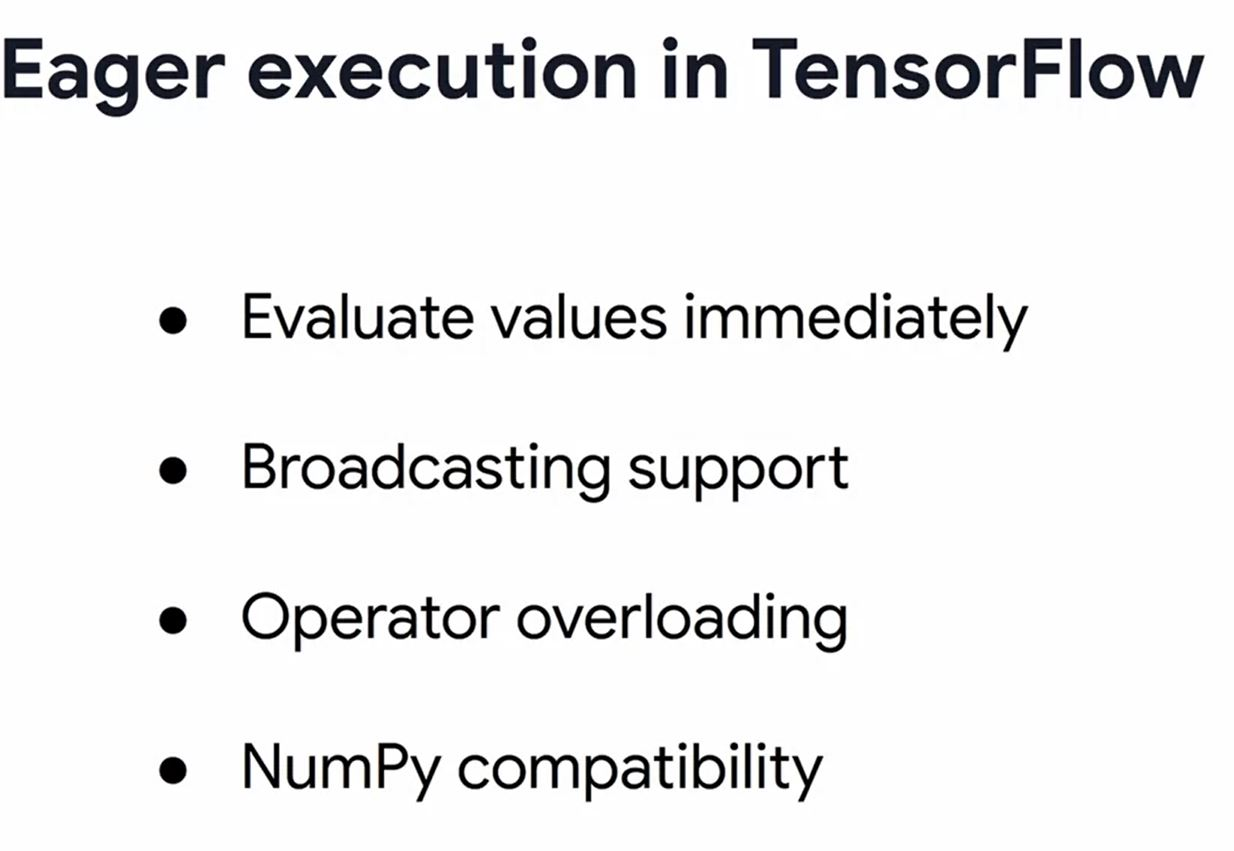

Evaluate_tensors
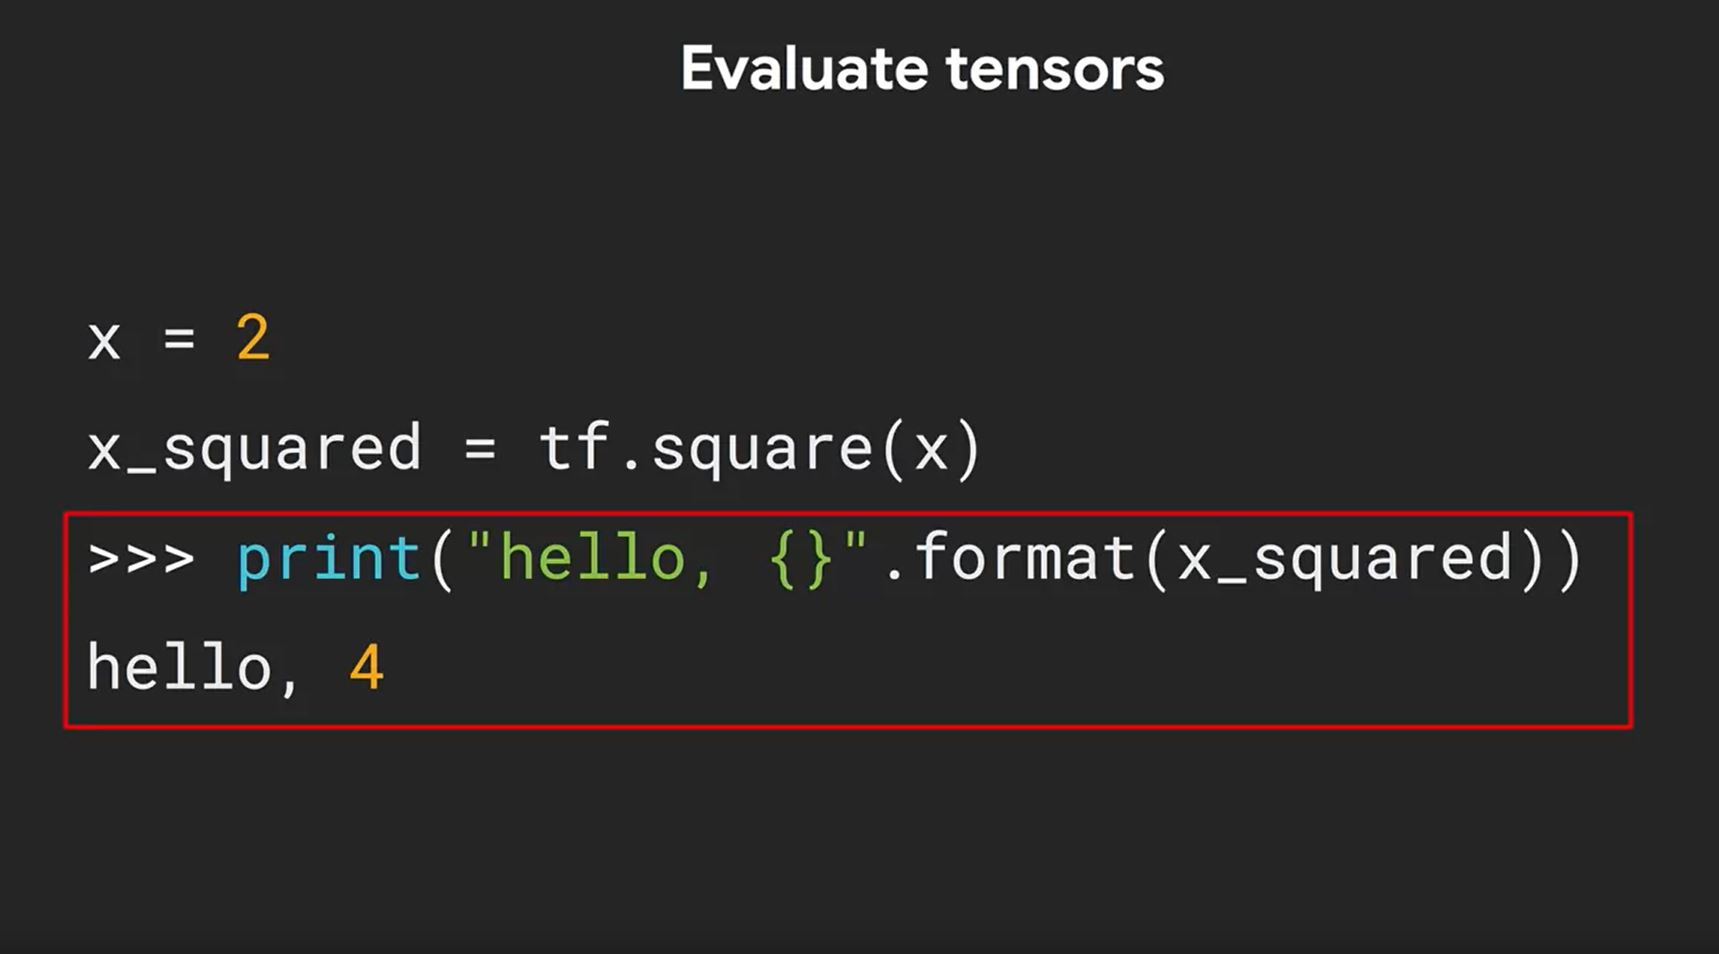

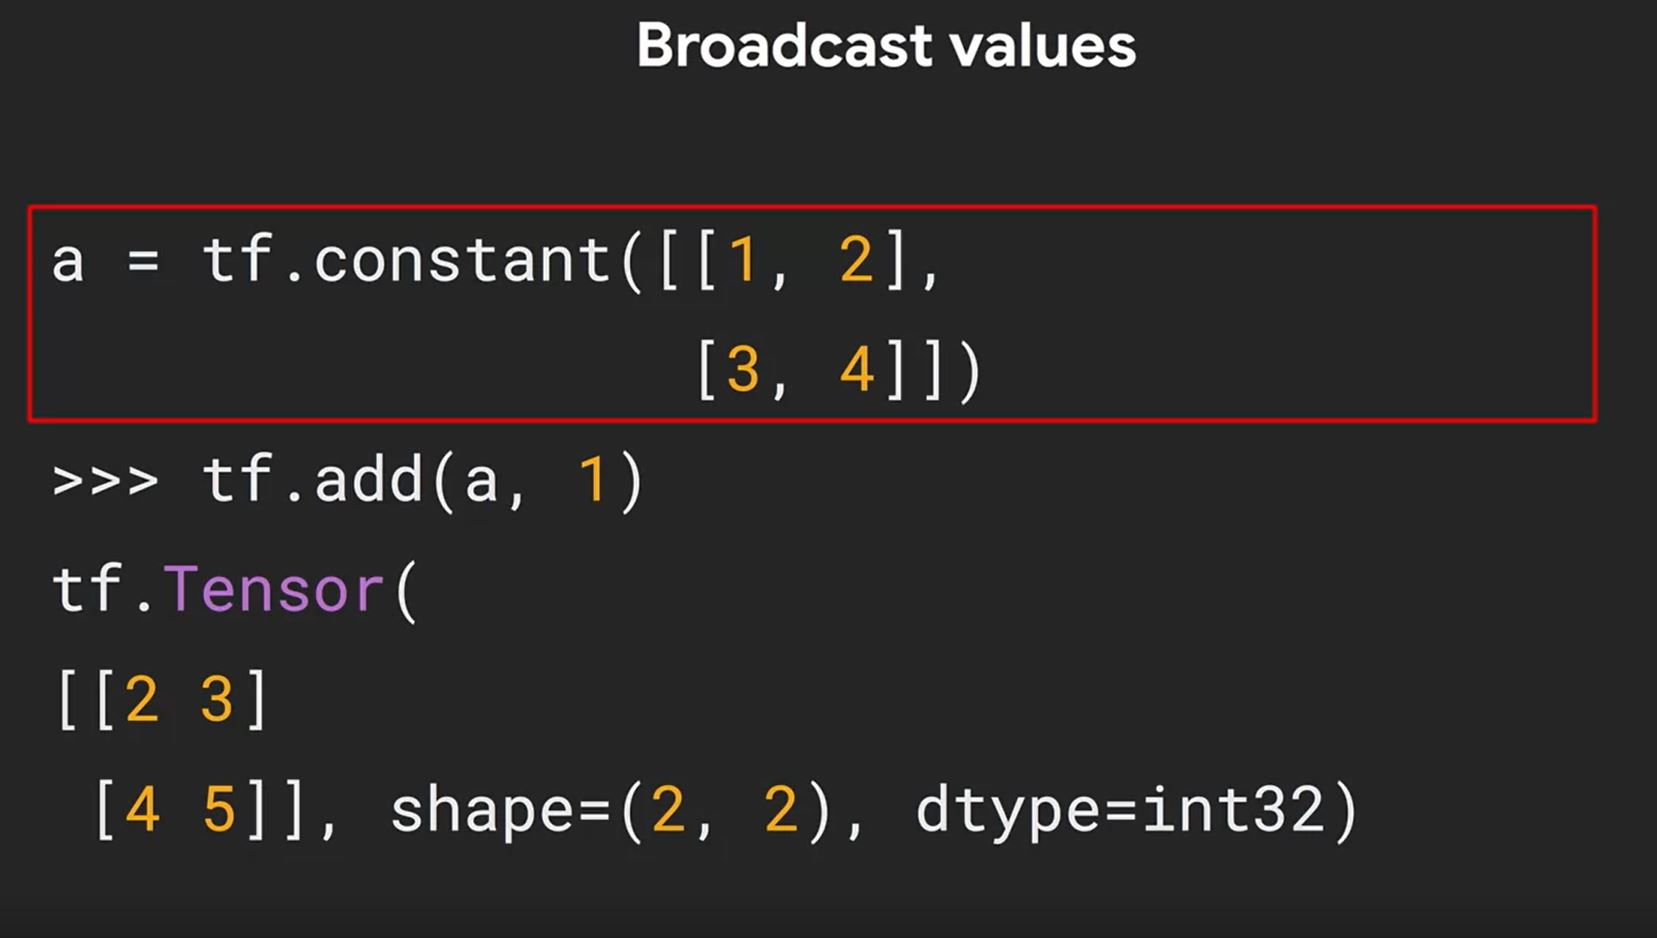

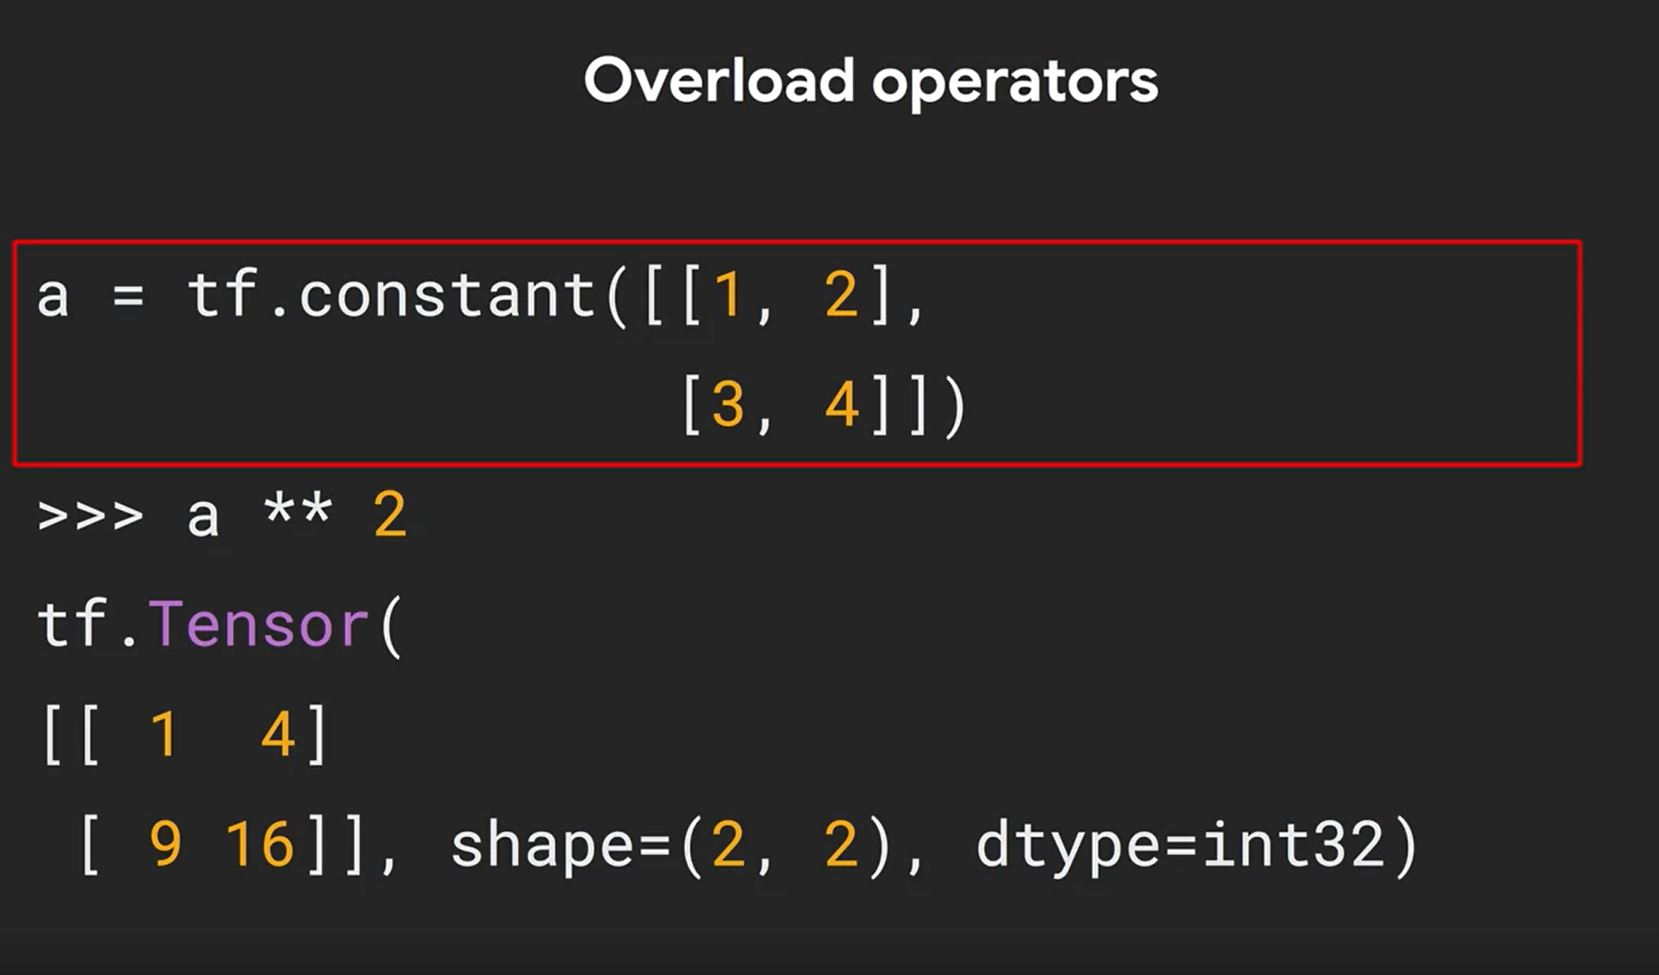

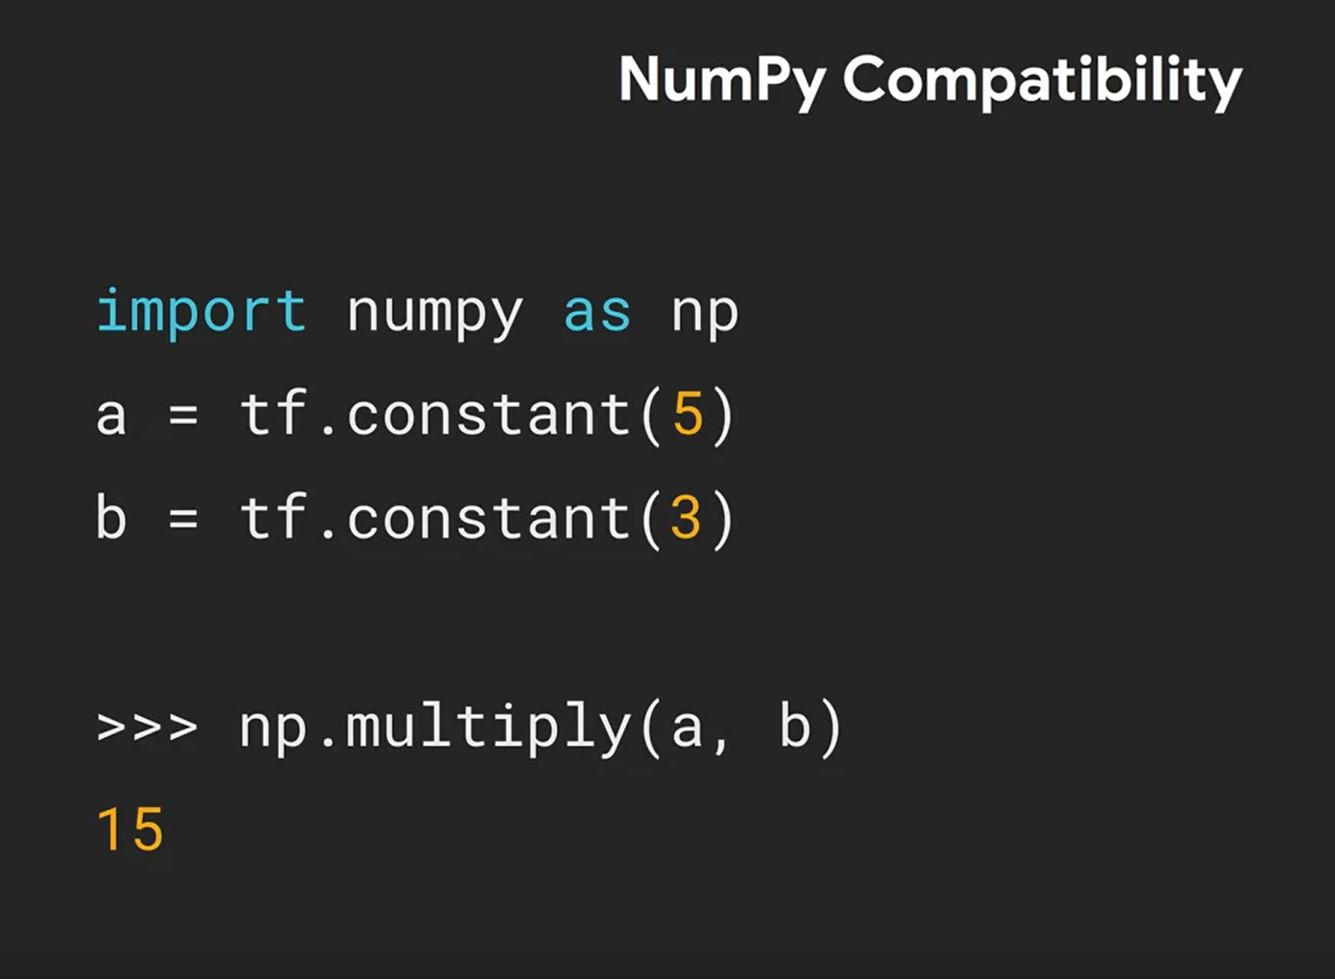

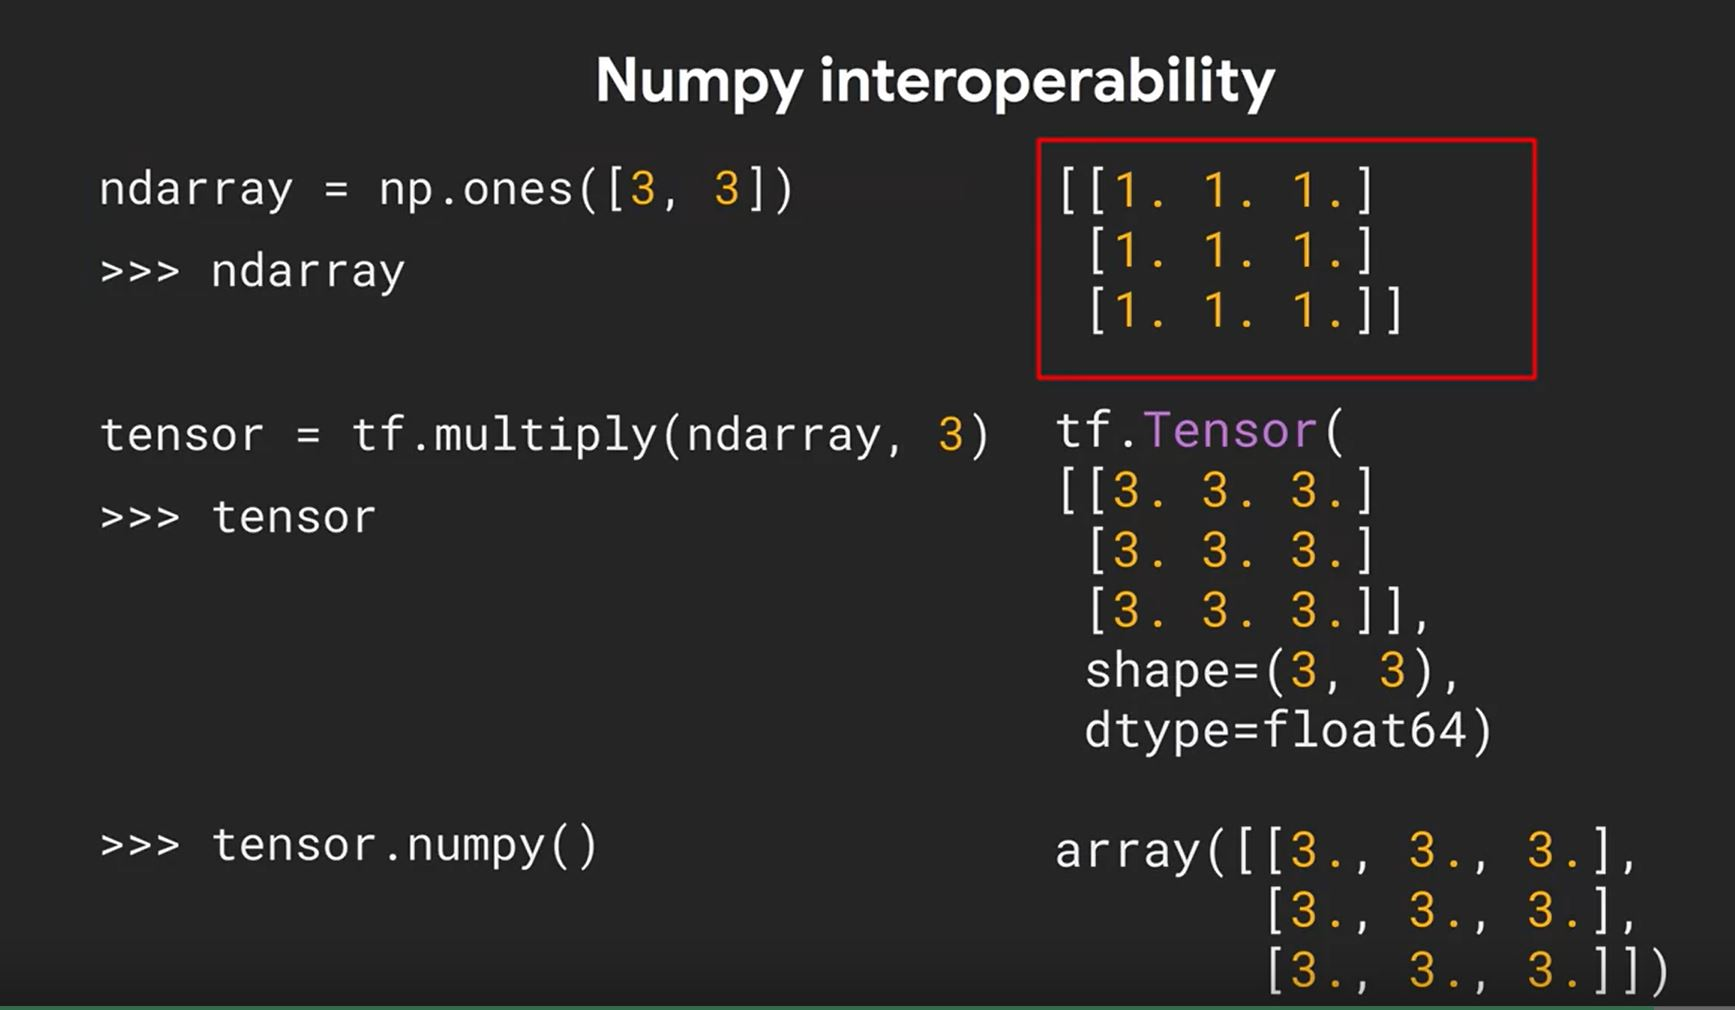

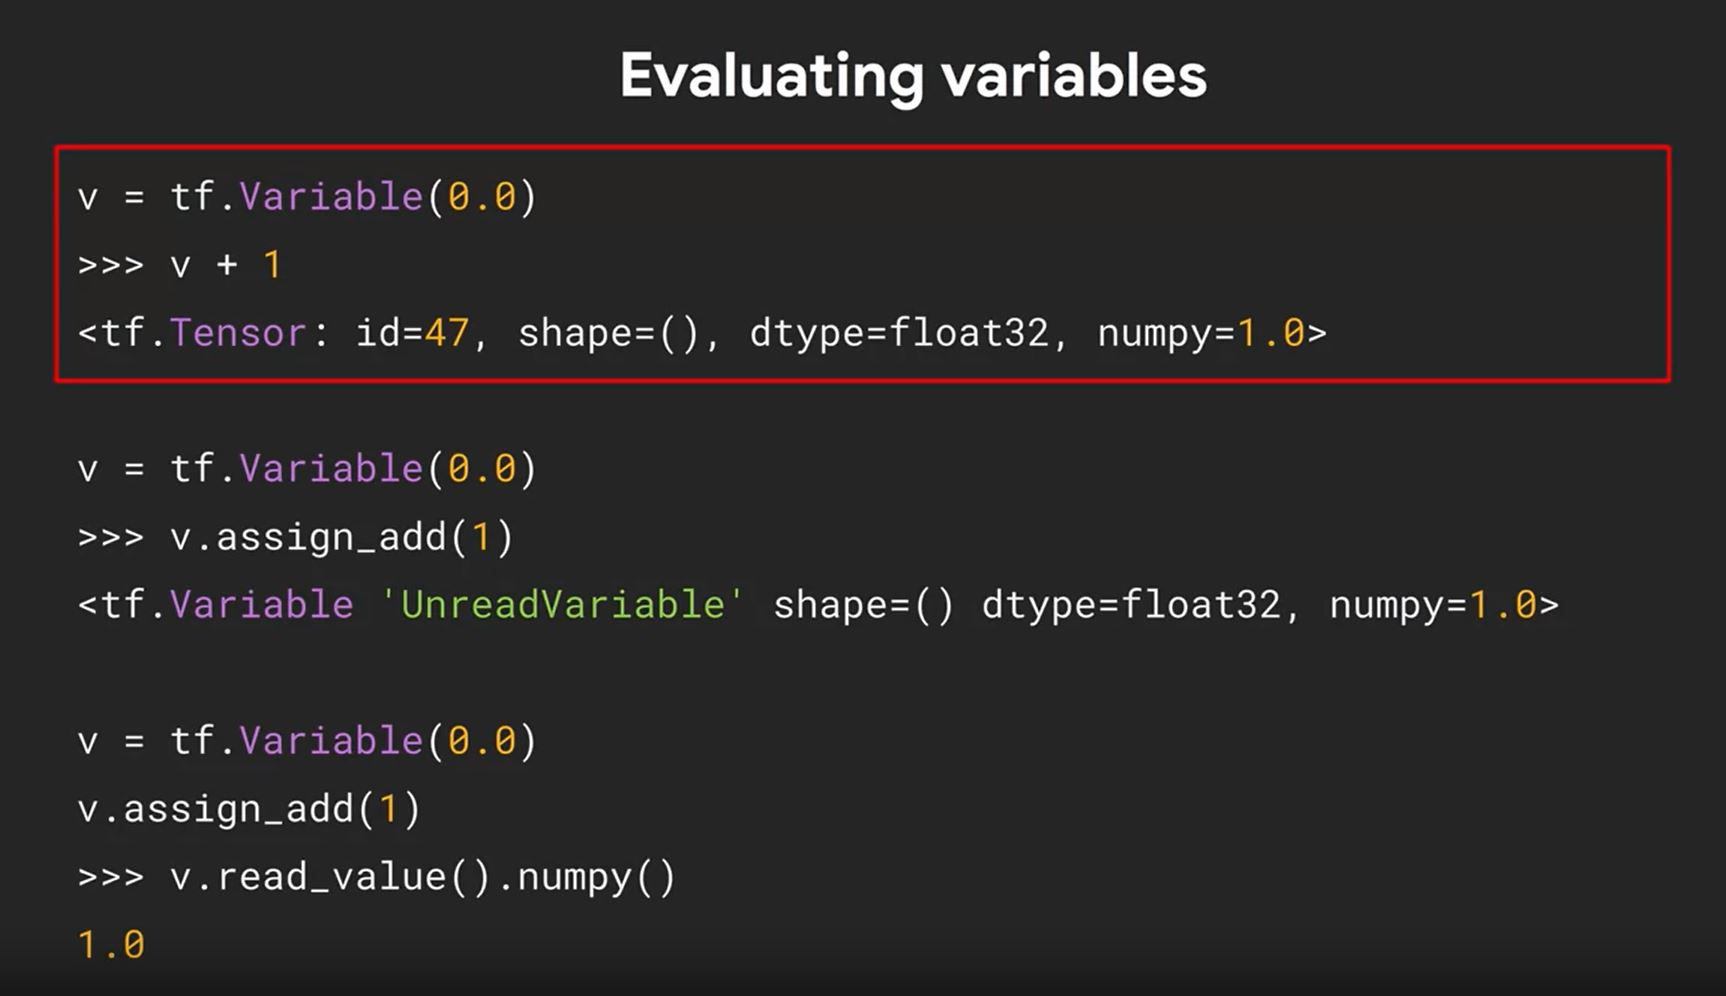


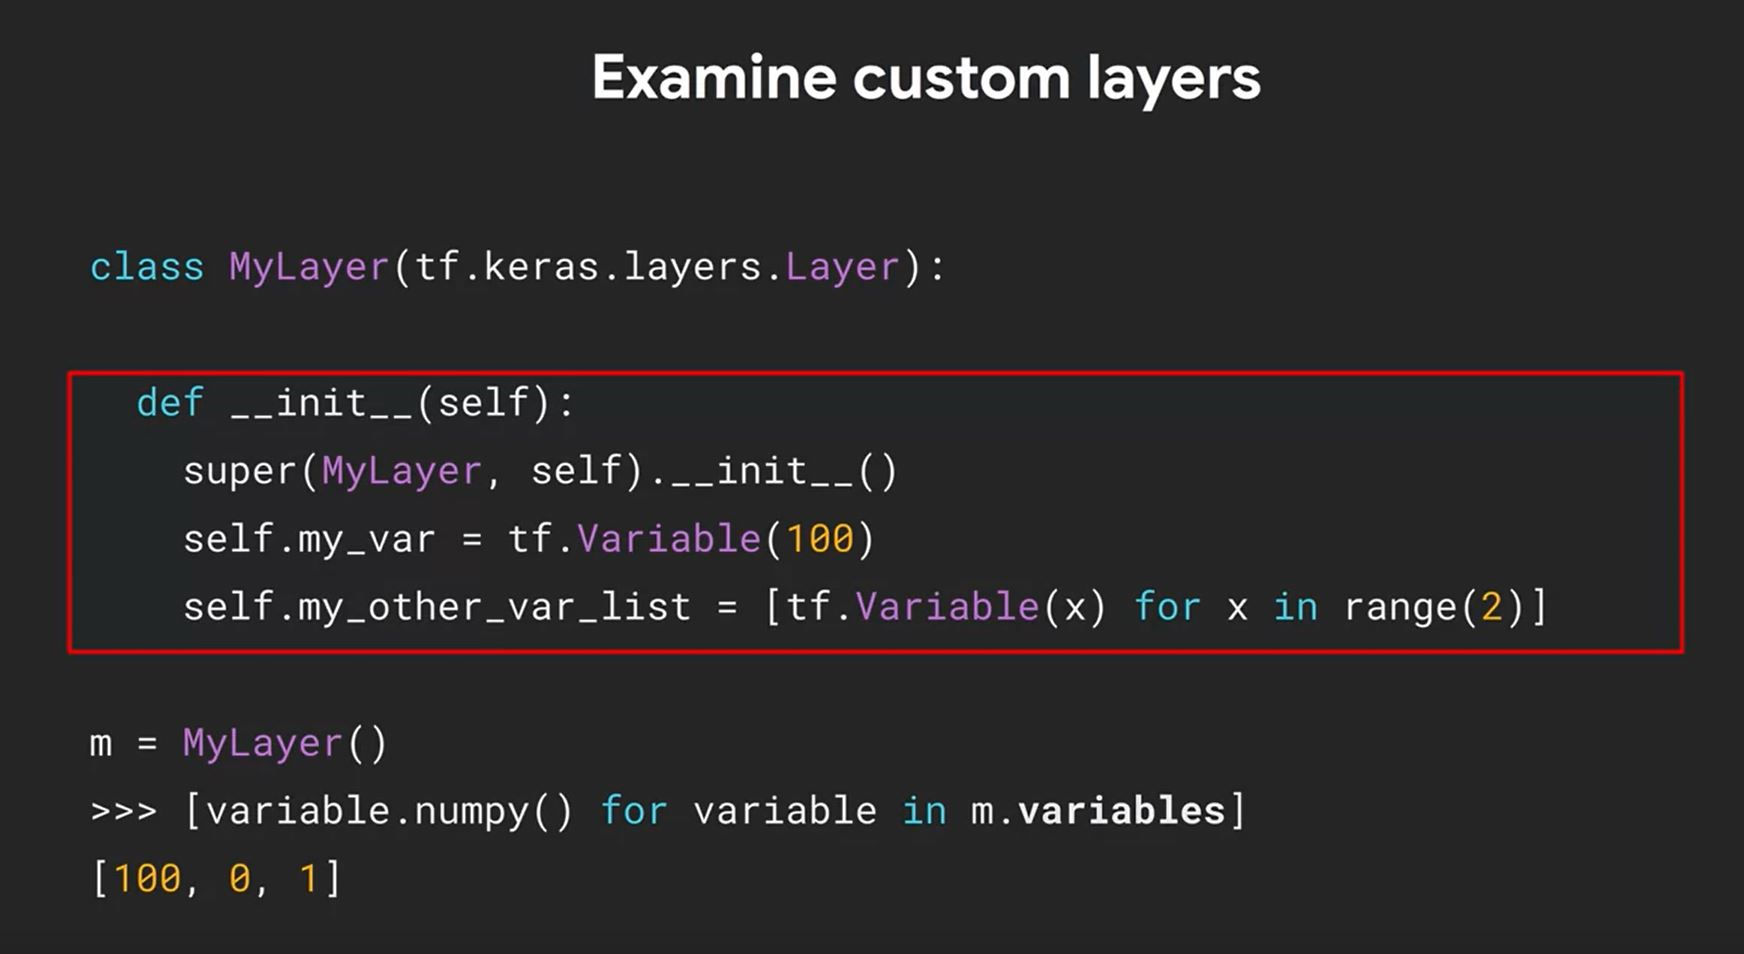

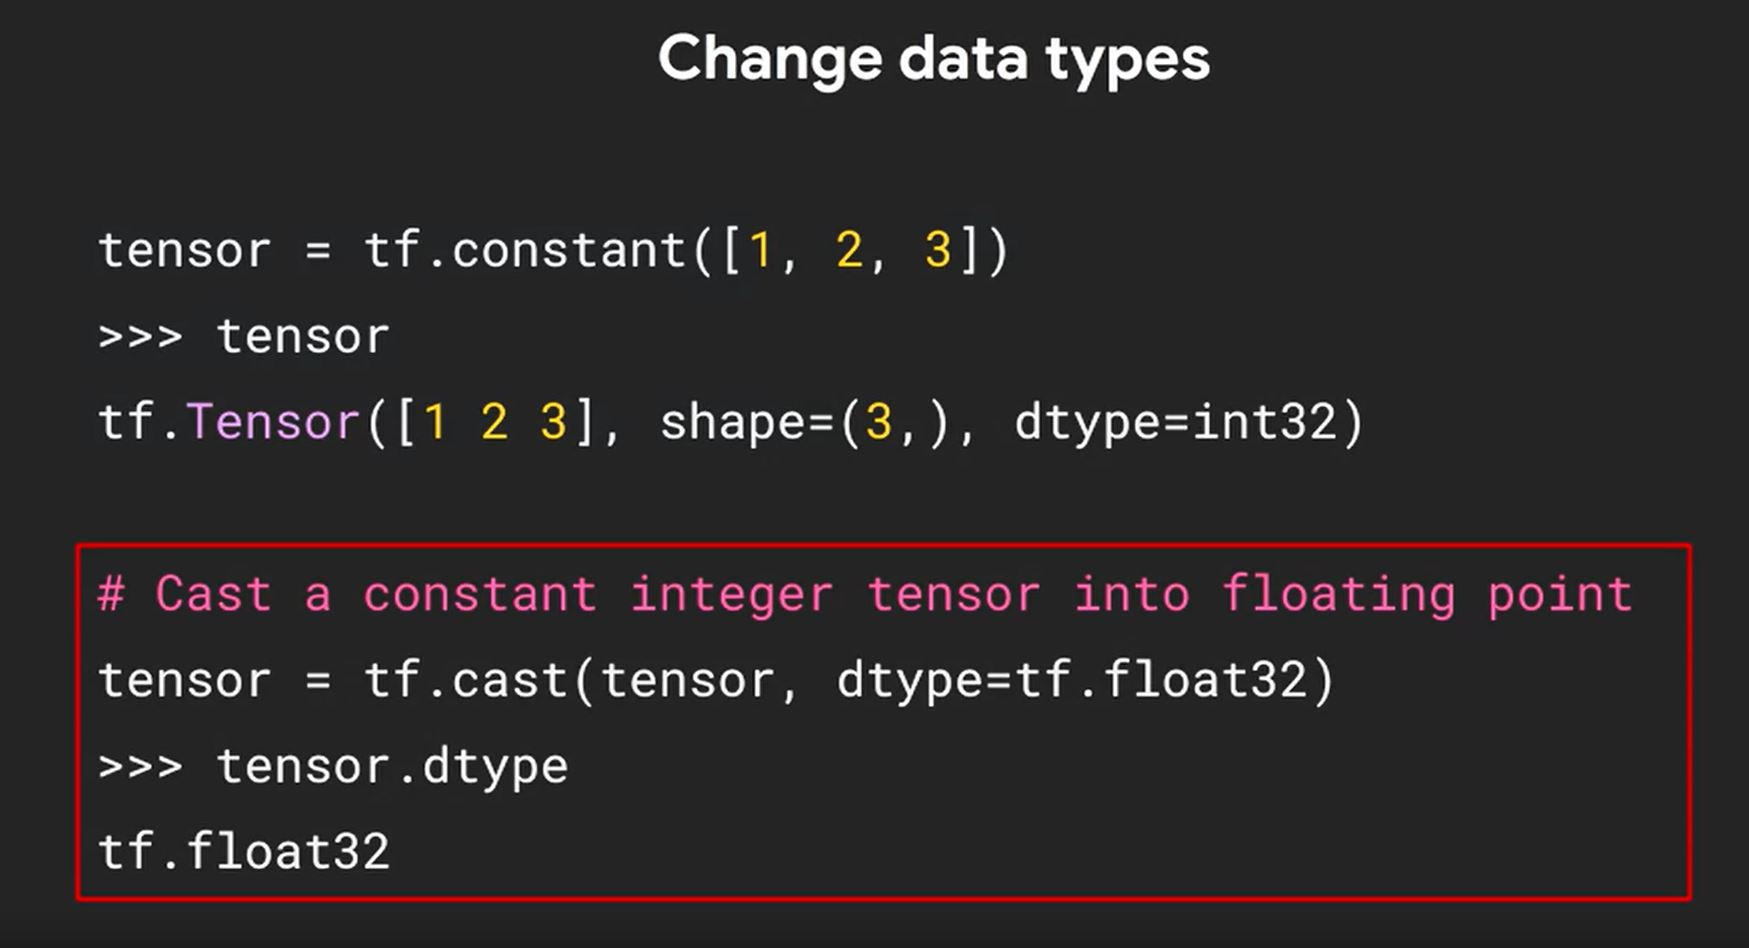

In [3]:
import tensorflow as tf
a = tf.constant([[5,7],[2,1]])
b = tf.add(a,2)
print(b)
c = b**2
print(c)
d = tf.reduce_sum(c)
print(d)

tf.Tensor(
[[7 9]
 [4 3]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[49 81]
 [16  9]], shape=(2, 2), dtype=int32)
tf.Tensor(155, shape=(), dtype=int32)


In [4]:

tf.Variable([[-1, -1, -1], [-1, -1, -1]], shape=[2, 3])

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[-1, -1, -1],
       [-1, -1, -1]])>

In [5]:

tf.Variable([[-1, -1, -1], [-1, -1, -1]], dtype=tf.int32)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[-1, -1, -1],
       [-1, -1, -1]])>

In [6]:

tf.constant([-1, -1, -1, -1, -1, -1], shape=[2, 3]) #but cannot be modified

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[-1, -1, -1],
       [-1, -1, -1]])>